In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification
import pandas as pd

In [12]:
db_name = "../nothuge_tw_iqr_gap_UB_diversesfill_diversesfill_smartAEainf_diverses_nonodes_sols_4_3_2_1_components.csv"
df = pd.read_csv(db_name)


char_cols = [
    "n", "m", "density", "planar", "bipartite", "radius", "diameter", "node_connectivity", "transitivity", "treewidth",
    "degree_min", "degree_max", "degree_p50", "degree_iqr",
    "closeness_centrality_min", "closeness_centrality_max", "closeness_centrality_p50", "closeness_centrality_iqr",
    "degree_centrality_min", "degree_centrality_max", "degree_centrality_p50", "degree_centrality_iqr",
    "clustering_min", "clustering_max", "clustering_p50", "clustering_iqr",
    "katz_centrality_min", "katz_centrality_max", "katz_centrality_p50", "katz_centrality_iqr",
    "pagerank_min", "pagerank_max", "pagerank_p50", "pagerank_iqr"
]

X = df[char_cols]
y = df["best_solver"]

In [13]:


# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform cross-validation
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Get the mean scores for each metric
accuracy = np.mean(cv_results['test_accuracy'])
precision = np.mean(cv_results['test_precision'])
recall = np.mean(cv_results['test_recall'])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.8990
Precision: 0.9127
Recall: 0.8840


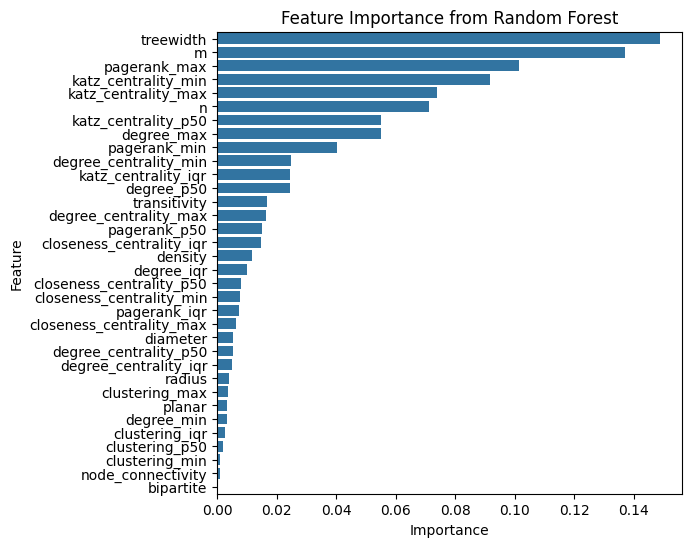

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Example DataFrame
# df = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100),
#     'feature3': np.random.rand(100),
#     'target': np.random.randint(0, 2, 100)
# })

# X = df[['feature1', 'feature2', 'feature3']]
# y = df['target']







# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


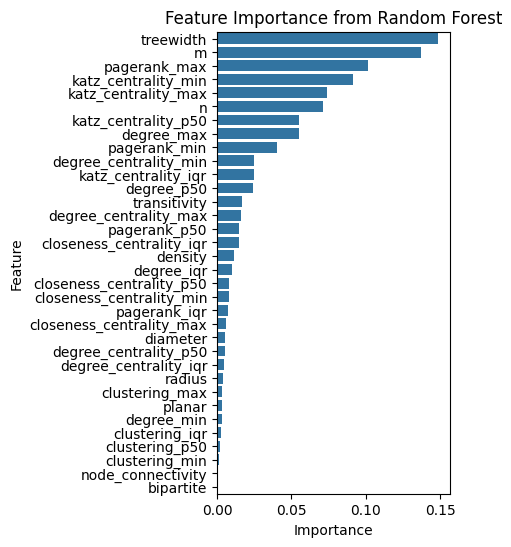

In [18]:
plt.figure(figsize=(3, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

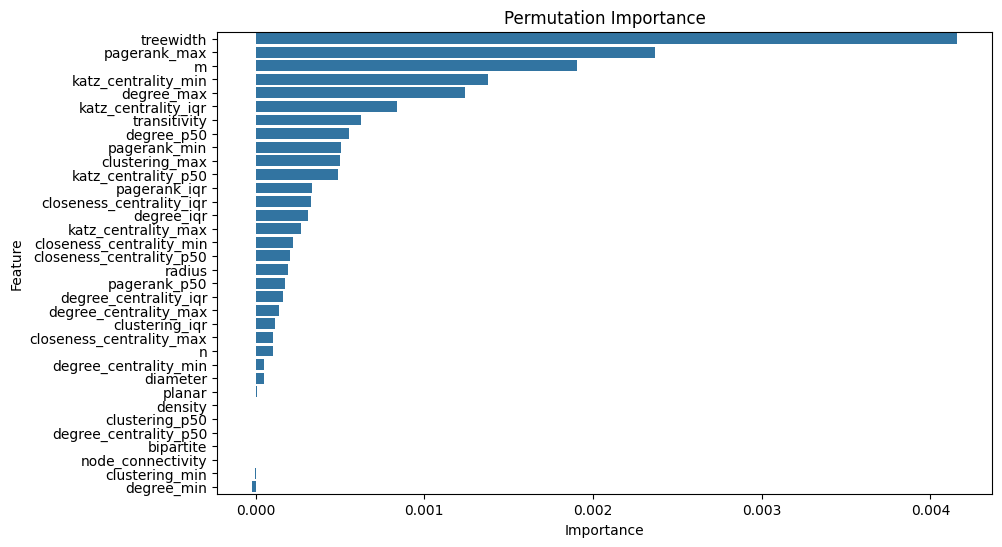

In [7]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=0)

# Create a DataFrame for better visualization
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()


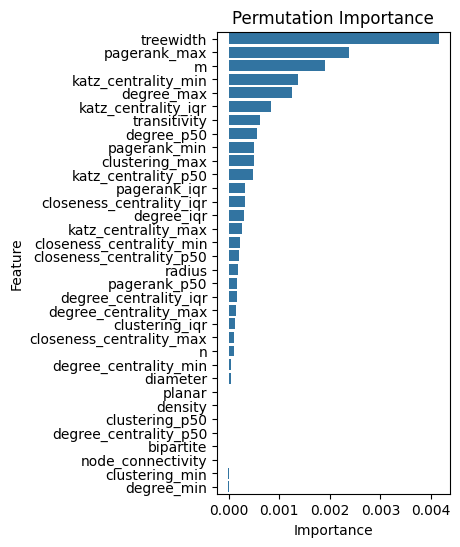

In [17]:
plt.figure(figsize=(3, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()

/home/lema/Documents/aproks/FAS/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


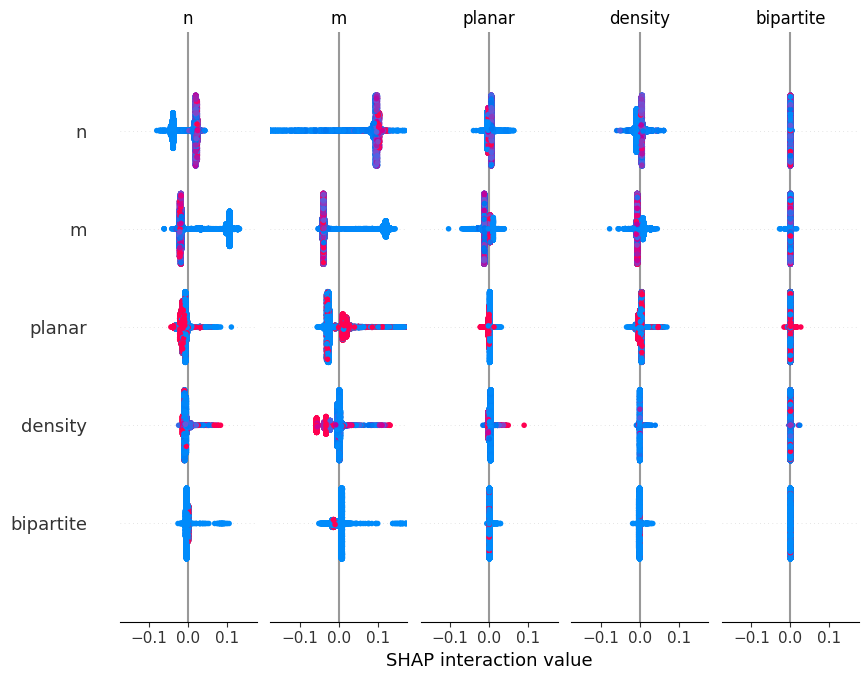

ValueError: Per-column arrays must each be 1-dimensional

In [8]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)

# Mean absolute SHAP value for each feature
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': np.mean(np.abs(shap_values), axis=0)
}).sort_values(by='SHAP Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='SHAP Importance', y='Feature', data=shap_df)
plt.title('SHAP Feature Importance')
plt.show()


In [14]:
shap_values

array([[[ 1.93846426e-02, -8.08827486e-03, -4.70392516e-03,
         -3.57918240e-03, -3.01326017e-03],
        [ 4.12533344e-02, -3.72946468e-02, -3.11916696e-04,
         -5.24575697e-03,  1.59898606e-03],
        [ 5.33104269e-03, -4.08592957e-03,  3.14352699e-04,
         -5.28088977e-04, -1.03137684e-03],
        ...,
        [ 7.42693569e-03, -1.12849842e-02, -1.29206044e-03,
          4.08651312e-03,  1.06359588e-03],
        [ 1.91077018e-03, -2.38290931e-03,  3.54080269e-04,
          5.42588372e-04, -4.24529505e-04],
        [-4.46966918e-03, -1.08934246e-03, -9.54052759e-05,
          5.03489666e-03,  6.19520260e-04]],

       [[ 1.66449801e-02, -7.95996045e-03, -3.06251373e-03,
         -2.88223428e-03, -2.74027165e-03],
        [ 3.15937560e-02, -3.37860572e-02,  3.25525556e-04,
         -2.09028547e-04,  2.07580425e-03],
        [ 7.55180963e-03, -3.90775851e-03,  6.99363494e-04,
         -2.89635879e-03, -1.44705584e-03],
        ...,
        [ 1.58312706e-02, -1.2588926

/home/lema/Documents/aproks/FAS/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


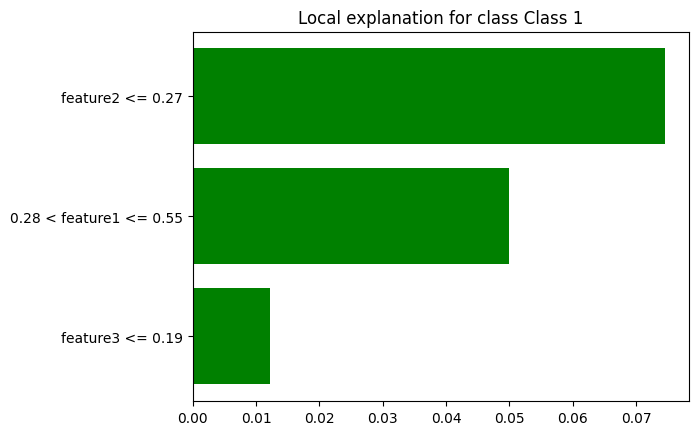

In [11]:
from lime import lime_tabular

# Initialize the explainer
explainer = lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns, class_names=['Class 0', 'Class 1'], discretize_continuous=True)

# Explain a single prediction
exp = explainer.explain_instance(X.iloc[0].values, model.predict_proba, num_features=5)

# Show explanation in a notebook
exp.show_in_notebook(show_table=True)

# Plot the explanation
exp.as_pyplot_figure()
plt.show()
